In [49]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2022-09-17 16:51:09--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.1’

housing.csv.1       100%[===================>]   1.36M  --.-KB/s    in 0.1s    

2022-09-17 16:51:09 (14.3 MB/s) - ‘housing.csv.1’ saved [1423529/1423529]



### Session #2 Homework

In [1]:
import pandas as pd
import numpy as np
import wget
import seaborn as sns
import matplotlib.pyplot as plt

### The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').

#### EDA

Load the data.
Look at the median_house_value variable. Does it have a long tail?

#### Features

For the rest of the homework, you'll need to use only these columns:

'latitude',

'longitude',

'housing_median_age',

'total_rooms',

'total_bedrooms',

'population',

'households',

'median_income',

'median_house_value'

Select only them.

### Question 1

Find a feature with missing values. How many missing values does it have?

- 207

- 307

- 408

- 508

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


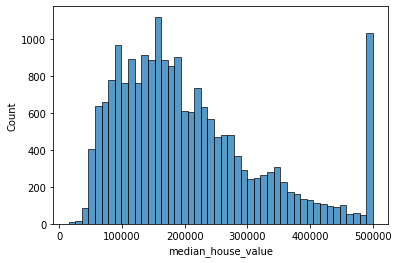

In [4]:
sns.histplot(df['median_house_value']);

In [5]:
df = df[['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']]

In [6]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### Question 2

#### What's the median (50% percentile) for variable 'population'?

- 1133

- 1122

- 1166

- 1188

In [7]:
df['population'].median()

1166.0

### Split the data

Shuffle the initial dataset, use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.
Make sure that the target value ('median_house_value') is not in your dataframe.
Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [8]:
n = len(df)
n_val = int(n * 0.3)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [9]:
idx = np.arange(n)

In [10]:
np.random.seed(42)
np.random.shuffle(idx)

In [11]:
df_train = df.iloc[idx[:n_train]]
df_val = df.loc[idx[:n_train:n_train+n_val]]
df_test = df.loc[idx[n_train+n_val:]]

In [12]:
y_train = np.log1p(df_train['median_house_value'])
y_val = np.log1p(df_train['median_house_value'])
y_test = np.log1p(df_train['median_house_value'])

In [13]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [14]:
def split_df(df, aim = 'median_house_value', split1 = 0.3, split2 = 0.2, seed = 42):
    n = len(df)
    n_val = int(n * split1)
    n_test = int(n * split2)
    n_train = n - n_val - n_test
    
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]]
    df_val = df.loc[idx[:n_train:n_train+n_val]]
    df_test = df.loc[idx[n_train+n_val:]]
    
    y_train = np.log1p(df_train[aim])
    y_val = np.log1p(df_val[aim])
    y_test = np.log1p(df_test[aim])
    
    del df_train[aim]
    del df_val[aim]
    del df_test[aim]
    
    return (df_train.values, 
            df_val.values, 
            df_test.values, 
            y_train.values, 
            y_val.values, 
            y_test.values)

### Question 3

#### We need to deal with missing values for the column from Q1.

We have two options: fill it with 0 or with the mean of this variable.
Try both options. For each, train a linear regression model without regularization using the code from the lessons.
For computing the mean, use the training only!
Use the validation dataset to evaluate the models and compare the RMSE of each option.
Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?

Options:

With 0

With mean

Both are equally good

In [15]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            20640 non-null  float64
 1   longitude           20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [17]:
df_zeros = df.fillna(0)

In [18]:
df_mean = df.fillna(df['total_bedrooms'].mean())

In [19]:
X_train, X_val, X_test, y_train, y_val, y_test = split_df(df_zeros)

In [20]:
w0, w = train_linear_regression(X_train, y_train)

In [21]:
y_pred = w0 + X_train.dot(w)

<AxesSubplot:ylabel='Count'>

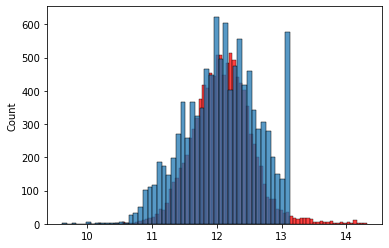

In [22]:
sns.histplot(y_pred, color='red')
sns.histplot(y_train)

In [23]:
def rmse(y, y_pred):
    se = error = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [24]:
rmse(y_val, y_pred)

1.3904662847191103

In [25]:
X_train, X_val, X_test, y_train, y_val, y_test = split_df(df_mean)

In [26]:
train_linear_regression(X_train, y_train)

(-11.522951433787757,
 array([-2.79539118e-01, -2.73949507e-01,  3.08509342e-03, -1.68898807e-05,
         2.42091958e-04, -1.91769486e-04,  4.78090274e-04,  1.74085276e-01]))

In [27]:
y_pred = w0 + X_train.dot(w)

<AxesSubplot:ylabel='Count'>

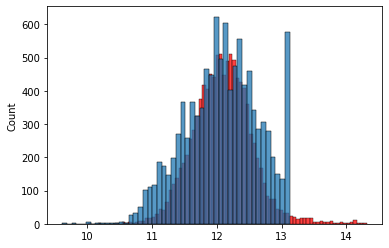

In [28]:
sns.histplot(y_pred, color='red')
sns.histplot(y_train)

In [29]:
rmse(y_val, y_pred)

1.3918733381044688

### Question 4

Now let's train a regularized linear regression.
For this question, fill the NAs with 0.
Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
Use RMSE to evaluate the model on the validation dataset.
Round the RMSE scores to 2 decimal digits.
Which r gives the best RMSE?
If there are multiple options, select the smallest r.

Options:

- 0

- 0.000001

- 0.001

- 0.0001

In [30]:
X_train, X_val, X_test, y_train, y_val, y_test = split_df(df_zeros)

In [31]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [32]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w0 + X_train.dot(w)
    score = rmse(y_val, y_pred)
    print(r, ' = ',  round(score, 2))

0  =  1.39
1e-06  =  1.39
0.0001  =  1.39
0.001  =  1.39
0.01  =  1.39
0.1  =  1.39
1  =  1.38
5  =  1.38
10  =  1.38


### Question 5

We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
For each seed, do the train/validation/test split with 60%/20%/20% distribution.
Fill the missing values with 0 and train a model without regularization.
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
Round the result to 3 decimal digits (round(std, 3))
Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.
Options:

- 0.16

- 0.00005

- 0.005

- 0.15555

In [33]:
val_score = []
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for seed in seeds:
    X_train, X_val, X_test, y_train, y_val, y_test = split_df(df_zeros, seed = seed)
    w0, w = train_linear_regression(X_train, y_train)
    y_pred = w0 + X_train.dot(w)
    score = rmse(y_val, y_pred)
    print(seed , ' = ',  round(score, 3))
    val_score.append(score)
# avg = sum(score)/len(score)
# avg
np.std(val_score)

0  =  0.526
1  =  0.835
2  =  0.642
3  =  0.602
4  =  0.455
5  =  0.784
6  =  0.467
7  =  0.838
8  =  0.939
9  =  0.47


0.17110122291951402

### Question 6

Split the dataset like previously, use seed 9.
Combine train and validation datasets.
Fill the missing values with 0 and train a model with r=0.001.
What's the RMSE on the test dataset?
Options:

- 0.35

- 0.135

- 0.450

- 0.245

In [34]:
X_train, X_val, X_test, y_train, y_val, y_test = split_df(df_zeros, seed=9)

In [47]:
X_comb = np.concatenate([X_train, X_val])
y_comb = np.concatenate([y_train, y_val])

In [44]:
w0, w = train_linear_regression_reg(X_comb, y_comb, 0.001)
y_pred = w0 + X_train.dot(w)
score = rmse(y_val, y_pred)
print(round(score, 2))

0.47
